# Задание 1


Дано: [Сайт Библио-Глобуса](https://www.biblio-globus.ru)

Мможно еще использовать вместо него [сайт Читай-Города](https://www.chitai-gorod.ru)


Задание: средствами парсинга (beautiful soup, selenium) ответить на список вопросов ниже


1) Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

2) Какое у этих книг распределение цен? (попробуйте нарисовать [гистограмму](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

3) Как соотносятся средние цены книг по Python, Машинному обучению и C++ ? (поясните, как именно вы доставали такие книги :), то есть "я буду доставать книги вот так, потому что...")


### 1. Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

In [135]:
from bs4 import BeautifulSoup
import time
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [38]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.0.0 Safari/537.36"
}

book_links = []

for i in tqdm(range(1, 250)):
    url = f"https://www.biblio-globus.ru/catalog/category?id=226&page={i}"
    response = requests.get(url, headers=headers)
    time.sleep(1 + 2 * random.random())
    soup = BeautifulSoup(response.text, 'html.parser')
    
    books = soup.find_all("a", class_="img_link")
    for book in books:
        link = book['href']
        full_link = "https://www.biblio-globus.ru" + link
        book_links.append(full_link)

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [27:08<00:00,  6.54s/it]


In [136]:
pages = []
prices = []

for link in tqdm(book_links):
    response = requests.get(link, headers=headers)
    time.sleep(3 * random.random())
    book_soup = BeautifulSoup(response.text, 'html.parser')
    pages_element = book_soup.find('td', string="Количество страниц:").find_next_sibling('td')
    if pages_element:
        pages.append(pages_element.text.strip())

    prices_element = book_soup.find('span', class_="price_with_discount")
    if prices_element:
        prices.append(prices_element.text.strip())
    else:
        prices_element_reserve = book_soup.find('span', class_="price_new")
        if prices_element_reserve:
            prices.append(prices_element_reserve.text.strip())
            # print("pages:", pages)
    # print("prices:", prices)

100%|████████████████████████████████████████████████████████████████████████████| 2985/2985 [2:17:50<00:00,  2.77s/it]


In [141]:
for i in range(len(pages)):
    while not pages[i].isdigit():
        pages[i] = pages[i][:-1]
    pages[i] = int(pages[i])

In [142]:
round(np.mean(pages))

456

### 2. Какое у этих книг распределение цен? (попробуйте нарисовать гистограмму)

In [151]:
p = prices.copy()

In [152]:
for i in range(len(p)):
    p[i] = int(p[i][:-2])

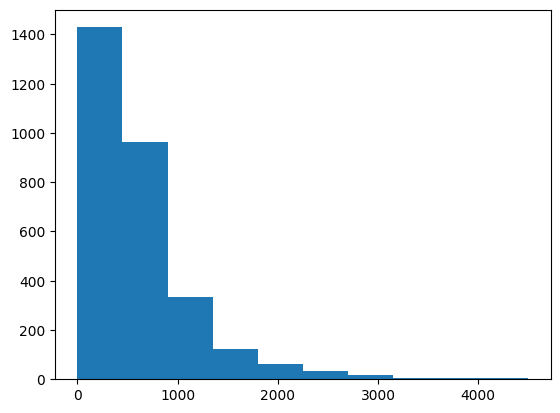

In [162]:
plt.hist(p, range=[0, 4500]);
# смещенное распределение

### 3. Как соотносятся средние цены книг по Python, Машинному обучению и C++ ? (поясните, как именно вы доставали такие книги :), то есть "я буду доставать книги вот так, потому что...")

Я буду доставать книги с помощью библиотеки requests, потому что так быстрее, чем при использовании selenium

In [97]:
def get_prices(query):
    prices = []
    for i in tqdm(range(1, 11)):
        url = f"https://www.biblio-globus.ru/search?query={query}&page={i}"
        response = requests.get(url, headers=headers)
        time.sleep(1 + 2 * random.random())
        soup = BeautifulSoup(response.text, 'html.parser')
        
        price = soup.find_all("span", class_="price_item_new")
    
        for el in price:
            prices.append(int(el.text.strip()[:-2]))

    return prices

In [98]:
python_prices = get_prices("Python")
cpp_prices = get_prices("C%2b%2b")
ML_prices = get_prices("Машинное+обучение")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.61s/it]


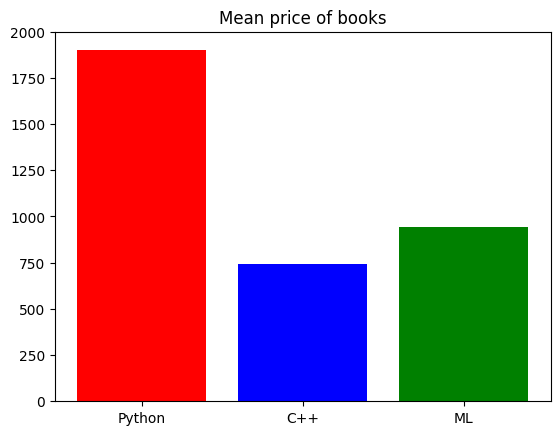

In [133]:
plt.bar(["Python", "C++", "ML"], [np.mean(python_prices), np.mean(cpp_prices), np.mean(ML_prices)], color=["red", "blue", "green"])
plt.title("Mean price of books")
plt.ylim([0, 2000]);

# Задание 2 про перевод из camel_case'a в snake_case

Дано произвольное название, написанное в camelCase, перевести его в snake_case

In [134]:
import re
v = 'camelCaseVar'

re.sub(r'(?<!^)(?=[A-Z])', '_', v).lower()

'camel_case_var'

## Задание 3, Про время 

Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. 
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте 
    чемодан, то уже в 09:00:01 я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте 
    чемодан, то уже в (TBD) я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!

In [164]:
inp = """Уважаемые! Если вы к 09:00 не вернёте 
чемодан, то уже в 09:00:01 я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

pattern = r'\b([01]\d|2[0-3]):[0-5]\d(:[0-5]\d)?\b'
result = re.sub(pattern, '(TBD)', inp)
print(result)

Уважаемые! Если вы к (TBD) не вернёте 
чемодан, то уже в (TBD) я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!


# Задание 4 Про отчетность 

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. 
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники 
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники 
    по 68921000.50653 рублей.

In [4]:
# Для решения вероятно в функцию sub надо будет пихать другую функцию. Пример "как это делать"

import re

def convert_func(matchobj):
    m =  matchobj.group(0)
    map = {'7': 'seven',
           '8': 'eight',
           '9': 'nine'}
    return map[m]

line = "7 ate 9"
new_line =  re.sub("[7-9]", convert_func, line)

new_line

'seven ate nine'

In [171]:
def cube(match):
    num = int(match.group(0))
    return str(num ** 3)

input = """Было закуплено 12 единиц техники 
по 410.37 рублей."""
output = re.sub(r'\d+', cube, input)
print(output)

Было закуплено 1728 единиц техники 
по 68921000.50653 рублей.
